In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv("/DowGmat_logistics_1.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Downloads/Gmat_logistics_1.csv'

In [ ]:
df.head()

,gmat,admitted
0,780,1
1,750,1
2,690,1
3,710,1
4,680,1


In [ ]:
df.dtypes

gmat        int64
admitted    int64
dtype: object

In [ ]:
df.describe()

,gmat,admitted
count,40.000000,40.000000
mean,654.000000,0.525000
std,61.427464,0.505736
min,540.000000,0.000000
25%,607.500000,0.000000
50%,660.000000,1.000000
75%,690.000000,1.000000
max,780.000000,1.000000


In [ ]:
df['gmat'].isnull().values.any()

False

In [ ]:
x=df.drop(['admitted'],axis=1)
y=df['admitted']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
CMatrix = confusion_matrix(y_test, y_pred)
print(CMatrix)

[[4 0]
 [0 4]]


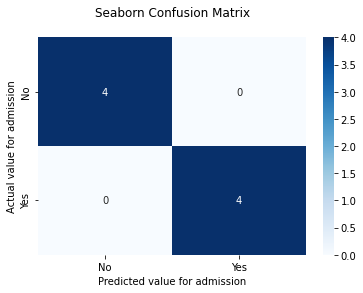

In [ ]:
ax = sns.heatmap(CMatrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix\n')
ax.set_xlabel('Predicted value for admission')
ax.set_ylabel('Actual value for admission')

ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

plt.show()

In [ ]:
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model is: ",Accuracy)

Accuracy of the model is:  1.0


In [ ]:
TP = CMatrix[1,1]
TN = CMatrix[0,0]
Total = len(y_test)
print("Accuracy from confusion matrix is: ", (TN+TP)/Total)

Accuracy from confusion matrix is:  1.0


In [ ]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.138117
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               admitted   No. Observations:                   32
Model:                          Logit   Df Residuals:                       30
Method:                           MLE   Df Model:                            1
Date:                Sat, 22 Jan 2022   Pseudo R-squ.:                  0.8002
Time:                        04:10:53   Log-Likelihood:                -4.4197
converged:                       True   LL-Null:                       -22.118
Covariance Type:            nonrobust   LLR p-value:                 2.689e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -101.5996     59.418     -1.710      0.087    -218.057      14.858
gmat           0.1546      0